<div class="alert alert-block alert-info" style="font-size:25px; font-family:verdana;">
     Lora/DB模型云端训练(适配Kaggle云平台) - Training GUI 秋叶版 
</div>

**创建时间：2023年11月11日**
**上次更新：2023年11月25日** 修复了环境问题
## <span style="color:red; font-weight:bold;">本项目旨在降低模型训练的门槛，帮助更多人不花钱就能炼出自己的模型</span>
* ### 使用教程在笔记最底下，拉下去即可查看
* ###  Lora训练GUI使用了秋叶发布的保姆式LoRA模型一键包文件，**对新人友好**
* ### Kaggle为世界最大的数据平台，提供了免费显卡资源。
* ### 经测试，此项目可在Android手机上Edge浏览器运行，但上传训练集步骤可能存在困难，建议PC端运行。
* ### 新版训练GUI现在支持训练DB大模型了，经过测试可训练

 ## 作者 BY bilibili NYAN9。此源码为免费公开，分享。若发现有人倒卖，请立即向作者举报




------------------

# 第一步： 填写你的训练集路径（右侧Add Data上传，将图片或者训练集传上去）

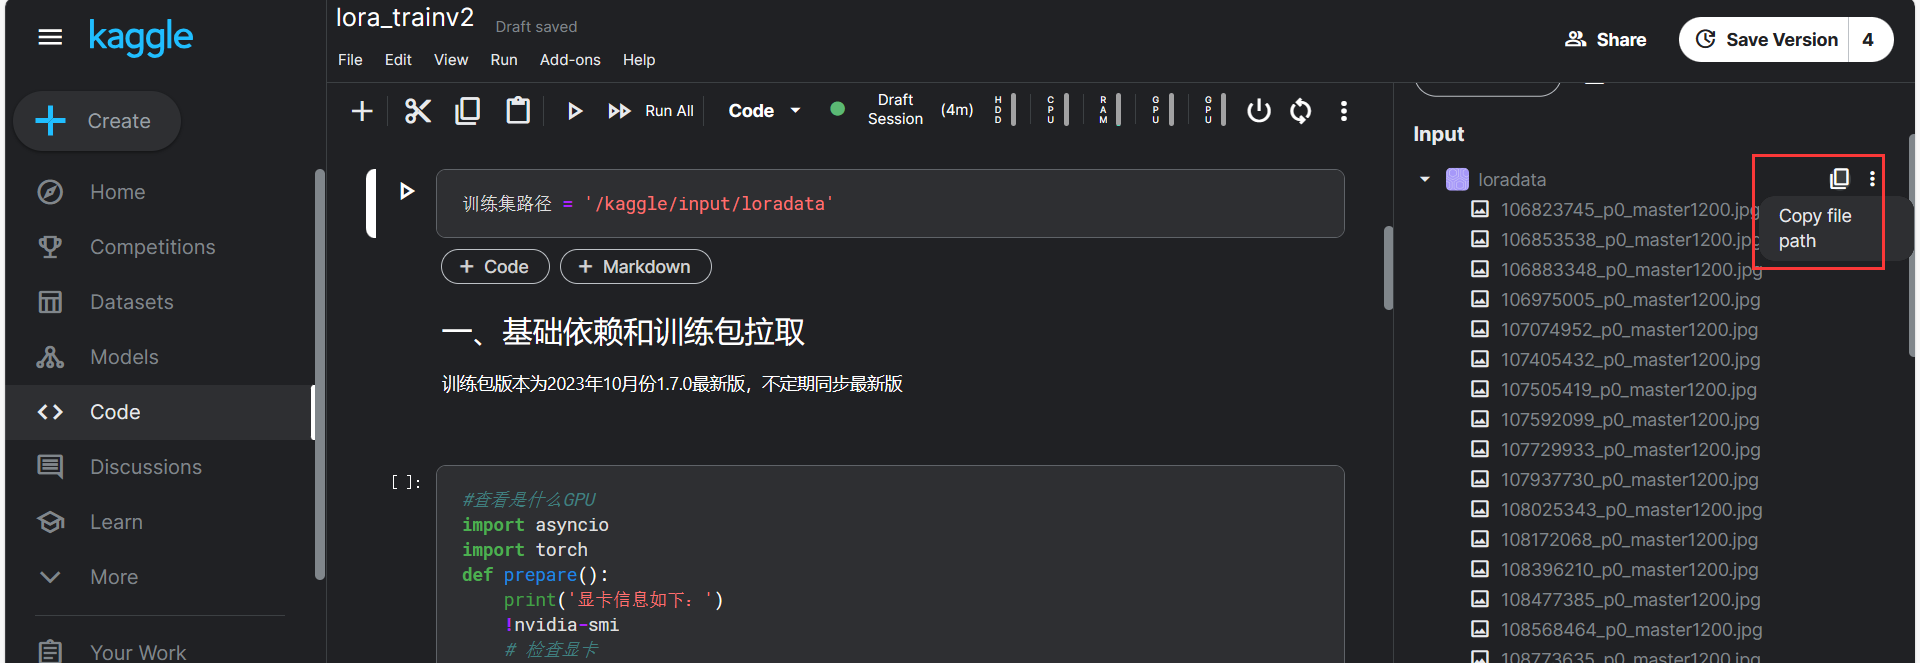

In [ ]:
import os
import shutil
import socket
import threading
训练集路径 = ['/kaggle/input/loradata/']  # 包含图片的训练集，可多个，注意路径最前面和最后面要加上/斜线才能复制图片，否则复制的会是目录
目标路径 = '/kaggle/lora-scripts/train/aki/5_loli'  # 3为循环次数，loli为触发词

#下面不要改
def copy():
    !rm -rf /kaggle/lora-scripts/train/* 

    for 路径 in 训练集路径:
        shutil.copytree(路径, os.path.join(目标路径, os.path.basename(路径)))

        print(f"成功将训练集复制到 '{目标路径}'")
    

---------------

In [ ]:
#查看是什么GPU
import asyncio
import torch
import subprocess
import os
import concurrent.futures
import subprocess
print('正在安装训练脚本，请等待600秒左右')
print("现在使用多线程安装，只需150秒即可")
!cd /kaggle && git clone https://github.com/KaggleSD/lora-scripts
def prepare():
    !apt-get update & pip3 install imjoy-elfinder
    # 安装 aria2 和 python3pip
    !echo 安装aria2下载器
    !apt install -y aria2 && 完成
   

    # 定义一个空文件路径
    devnull = open(os.devnull, 'w')

    # 设置标准输出和标准错误流都重定向到空文件
    command = "imjoy-elfinder --root-dir=/kaggle --port=8076"
    process = subprocess.Popen(command, shell=True, stdout=devnull, stderr=subprocess.STDOUT)
    devnull.close()
    print('显卡信息如下：')
    !nvidia-smi
    # 检查显卡
    print('CUDA版本:',torch.version.cuda)
    print('Pytorch版本:',torch.__version__)
    print('显卡是否可用:','可用' if(torch.cuda.is_available()) else '不可用')
    print('显卡数量:',torch.cuda.device_count())
    print('是否支持BF16数字格式:','支持' if (torch.cuda.is_bf16_supported()) else '不支持')
    print('当前显卡型号:',torch.cuda.get_device_name())
    print('当前显卡的CUDA算力:',torch.cuda.get_device_capability())
    print('当前显卡的总显存:',torch.cuda.get_device_properties(0).total_memory/1024/1024/1024,'GB')
    print('是否支持TensorCore:','支持' if (torch.cuda.get_device_properties(0).major >= 7) else '不支持')
    print('当前显卡的显存使用率:',torch.cuda.memory_allocated(0)/torch.cuda.get_device_properties(0).total_memory*100,'%')
    #安装解压软件和下载存储工具
## 一、基础依赖和训练包拉取 (不用改这里)
## 训练包版本为2023年10月份1.7.0最新版，不定期同步最新版
def install1():
    #!sudo rm -r /kaggle/lora-scripts/
    %cd  /kaggle/
    #!git clone https://gitee.com/nyan9/lora-scripts_1.git
    #!mv lora-scripts_1 lora-scripts
    
    print('下载预训练模型，大小1.2G')
    !mkdir -p /kaggle/lora-scripts/huggingface/
    !cd /kaggle/lora-scripts/huggingface/ && aria2c -x 16 -s 16 -k 1M -c https://liblibai-online.vibrou.com/web/model/c52a9848ee316e16b59a0fe17e17edc4c767f97f652b439d9da758d6077160ae.ckpt  -o 1.zip
    !unzip -o /kaggle/lora-scripts/huggingface/1.zip -d /kaggle/lora-scripts/huggingface/ && echo 解压成功
    !sudo rm -r /kaggle/lora-scripts/huggingface/1.zip && echo 删除压缩包成功
    !mkdir -p /kaggle/lora-scripts/train/aki
    !mkdir -p /kaggle/lora-scripts/train/reg
    !echo 训练包拉取成功

In [ ]:
'''
### 说明：
# 由于Kaggle没有自带内网穿透，无法访问GUI和文件管理浏览器，所以这里使用了本人的公益Frp内网穿透。才得以访问训练GUI
'''
import subprocess
import shutil
import os
import time
import random

use_frpc = True
frpconfigfile = '/kaggle/input/aihua-5000/frpc_10669839.ini'
random_number = random.randint(1000, 9999)
config = """
[common]
server_addr = frp.freefrp.net
server_port = 7000
token = freefrp.net

[28000loratrainUI]
type = tcp
local_ip = 127.0.0.1
local_port = 28000
# remote_port = 17861

"""
config_with_random_number = config.replace('[28000loratrainUI]', f'[28000loratrainUI_{random_number}]')
# 定义保存路径
file_path = '/kaggle/working/cyanfrp.ini'

# 将配置内容写入文件
with open(file_path, 'w') as config_file:
    config_file.write(config_with_random_number)



def install_Frpc(port, frpconfigfile, use_frpc):
    if use_frpc:
        #!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.sukaka.top/datasets/ACCA225/LoCyanfrp/resolve/main/frpc -d ./frpc -o frpc
        !cp /kaggle/input/net-tools/frpc /kaggle
        subprocess.run(['chmod', '+x', '/kaggle/frpc'], check=True)
        print(f'正在启动frp，端口{port}')
        # 将frp的输出重定向到文件
        with open('/kaggle/frp.log', 'w') as frp_output_file:
            subprocess.Popen(['/kaggle/frpc', '-c', '/kaggle/working/cyanfrp.ini'], stdout=frp_output_file, stderr=subprocess.STDOUT)
        !sleep 5
        !cat /kaggle/frp.log




In [ ]:

def extract_ip_with_port_from_log(log_file):
    print('测试')
    with open(log_file, 'r') as file:
        log_content = file.read()
        
        ip_port_pattern = re.compile(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}:[0-9]+\b')
        
        ip_addresses_with_port = re.findall(ip_port_pattern, log_content)
        return ip_addresses_with_port

def iframe_thread_1(port):
    ip_addresses_with_port = extract_ip_with_port_from_log('/kaggle/frp.log')  # Replace with your actual log file
    while True:
        time.sleep(0.5)
        sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        result = sock.connect_ex(('127.0.0.1', port))
        if result == 0:
            break
        sock.close()
        !sleep 18
        copy()
        print("Lora训练GUI的IP地址：", ip_addresses_with_port)


def extract_ip_with_port_from_log2(log_file):
    with open(log_file, 'r') as file:
        log_content2 = file.read()
        
        ip_port_pattern2 = re.compile(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}:[0-9]+\b')
        
        ip_addresses_with_port2 = re.findall(ip_port_pattern2, log_content2)
        return ip_addresses_with_port2

def iframe_thread_2(port):
    ip_addresses_with_port2 = extract_ip_with_port_from_log('/kaggle/frp2.log')  # Replace with your actual log file
    while True:
        time.sleep(0.5)
        sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
        result = sock.connect_ex(('127.0.0.1', port))
        if result == 0:
            break
        sock.close()
        !sleep 22
        print("文件管理器地址：", ip_addresses_with_port2)


In [ ]:
'''
### 说明：
# 由于Kaggle没有自带内网穿透，无法访问GUI和文件管理浏览器，所以这里使用了本人的公益Frp内网穿透。才得以访问文件浏览器
'''


# 关闭文件描述符

import subprocess
import shutil
import os
import time

use_frpc1 = True
frpconfigfile1 = '/kaggle/input/aihua-5000/frpc_10669839.ini'
import random

# 生成四位随机数，防止端口冲突
random_number = random.randint(1000, 9999)

config1 = """
[common]
server_addr = frp.freefrp.net
server_port = 7000
token = freefrp.net

[28000fileUI]
type = tcp
local_ip = 127.0.0.1
local_port = 8076
# remote_port = 17861
"""

config1_with_random_number = config1.replace('[28000fileUI]', f'[28000fileUI_{random_number}]')

file_path = '/kaggle/working/nyanfrp.ini'

# 将配置内容写入文件
with open(file_path, 'w') as config_file:
    config_file.write(config1_with_random_number)


def install_Frpc1(port, frpconfigfile1, use_frpc1):
    if use_frpc1:
        #!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.sukaka.top/datasets/ACCA225/LoCyanfrp/resolve/main/frpc -d ./frpc -o frpc
        !cp /kaggle/input/net-tools/frpc /kaggle
        subprocess.run(['chmod', '+x', '/kaggle/frpc'], check=True)
        print(f'正在启动frp，端口{port}')
        # 将frp的输出重定向到文件
        with open('/kaggle/frp2.log', 'w') as frp_output_file:
            subprocess.Popen(['/kaggle/frpc', '-c', '/kaggle/working/nyanfrp.ini'], stdout=frp_output_file, stderr=subprocess.STDOUT)
        !sleep 5
        !cat /kaggle/frp2.log

#install_Frpc1('8076', frpconfigfile1, use_frpc1)

---------------

# 第二步：训练底模下载

### 只修改下方模型链接即可替换底膜  
## <span style="color:red; font-weight:bold;">更多底模请拉到最底下说明文档</span>

In [ ]:
def model():
    !mkdir -p /kaggle/lora-scripts/sd-models/
    模型链接 = "https://huggingface.co/datasets/ACCC1380/private-model/resolve/main/kaggle/input/shs-ps1/SHS.ckpt" #双引号内填模型下载地址
    模型命名及后缀="model.ckpt" #双引号内填模型命名及后缀
    下载路径 = "/kaggle/lora-scripts/sd-models/"  #双引号内填模型的下载路径
    print(f'下载训练底模 {模型命名及后缀}')
    !cd "{下载路径}" && aria2c --console-log-level=error -x 16 -s 16 -k 1M -c "{模型链接}" -o "{模型命名及后缀}" && echo 下载成功
#-----------------------------------------------下面别改-----------------------------------
install_path2 = '/kaggle/opt/conda/envs/'
Venvpath = '/kaggle/input/lolidreambooth/kaggle/working/venv.tar.bak' 
def venv_install():
    if os.path.exists(Venvpath):
        if os.path.exists('/kaggle/working/opt'):
            !source /kaggle/working/opt/conda/envs/venv/bin/activate venv
            print('环境安装完毕')
        else:
            os.makedirs(install_path2, exist_ok=True)
            %cd {install_path2}
            !mkdir venv
            print('安装VENV环境')
            !tar -xf {Venvpath} -C {install_path2}venv
                #!source /kaggle/working/opt/conda/envs/venv/bin/activate venv
            print('环境安装完毕')
                    #安装依赖
    

# 训练VAE下载

In [ ]:
# 下载 VAE （SDXL训练需要用到）
是否下载sdxl_vae = False
def vae():
    if 是否下载sdxl_vae:
        !mkdir -p /kaggle/lora-scripts/sd-models/vae
        模型链接2 = "https://huggingface.co/madebyollin/sdxl-vae-fp16-fix/resolve/main/sdxl_vae.safetensors" #双引号内填模型下载地址
        模型命名及后缀2="sdxl_vae.safetensors" #双引号内填模型命名及后缀
        下载路径2 = "/kaggle/lora-scripts/sd-models/vae"  #双引号内填模型的下载路径
        print(f'下载训练底模 {模型命名及后缀2}')
        !cd "{下载路径2}" && aria2c --console-log-level=error -x 16 -s 16 -k 1M -c "{模型链接2}" -o "{模型命名及后缀2}" && echo 下载成功
        #安装依赖

--------------

In [ ]:
import concurrent.futures
'''
执行函数
'''
import time
def install():
    start_time = time.time()
    # 启动一个线程执行venv_install()
    venv_install_thread = threading.Thread(target=venv_install)
    venv_install_thread.start()
    prepare_thread = threading.Thread(target=prepare)
    prepare_thread.start()
    prepare_thread.join()
    install1_thread = threading.Thread(target=install1)
    install1_thread.start()
    vae()
    model()
    install_Frpc('28000', frpconfigfile, use_frpc)
    install_Frpc1('8076', frpconfigfile, use_frpc)
    !apt-get install -y python3-pip
    !apt-get install -y libfuse-dev
    print("等待Python环境安装完成")
    venv_install_thread.join()
    # 计算总耗时
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"加载耗时: {elapsed_time} 秒")
    

# 自动上传模型到Huggingface (可选)
防止Kaggle存储不够导致训练失败。Huggingface有无限存储。

In [ ]:
## 启动秋葉aaaki的一键式lora训练界面
upload = False
import re
import asyncio
#功能函数，清理打包上传
from pathlib import Path
from huggingface_hub import HfApi, login
directory_path = '/kaggle/input/mohemodel'
install_path="/kaggle/working" 
# 使用huggingface保存和载入webui配置文件
huggingface_use = True
huggingface_token_file = '/kaggle/input/tenkens/hugfacetoken.txt'
huggiingface_repo_id = 'ACCC1380/private-model'
hugToken = 'hf_JZFqkANVBeq**DrDtSCARGoWlIcFY'
uploadhf = True
repo_id = 'ACCC1380/private-model'
import os
import time
from pathlib import Path
import re
import asyncio
from huggingface_hub import HfApi, login

directory = '/kaggle/working' #搜索的目标目录
yun_files = []  # Define yun_files outside the try block

def compress_images(directory, huggingface_token_file, repo_id):
    if upload:
        initial_files = set()
        for root, _, files in os.walk(directory):
            for file in files:
                if file.endswith(('.safetensors', '.ckpt')):
                    filepath = os.path.join(root, file)
                    initial_files.add(filepath)
        while True:
            try:
                time.sleep(0.1)
                current_files = set()
                for root, _, files in os.walk(directory):
                    for file in files:
                        if file.endswith(('.safetensors', '.ckpt')):
                            filepath = os.path.join(root, file)
                            current_files.add(filepath)

                new_files = current_files - initial_files
                if new_files:
                    print("New files detected:")
                    yun_files = list(new_files)
                    !sleep 2
                    for new_file in yun_files:
                        print(yun_files)
                        hugface_upload(huggingface_token_file, yun_files, repo_id)
                    for uploaded_file in yun_files:
                        os.remove(uploaded_file)
                    initial_files = current_files
            except Exception as e:
                print(f"发生错误: {e}")
                # Handle the error as needed
                break  # Terminate the loop on error

def hugface_upload(huggingface_token_file, yun_files, repo_id):
    if uploadhf:
        if hugToken != '':
            # Use your Hugging Face access token to log in
            login(token=hugToken)
            # Instantiate the HfApi class
            api = HfApi()
            print("HfApi class instantiated")
            # Use the upload_file() function to upload files
            print("Starting file upload...")
            for yun_file in yun_files:
                if Path(yun_file).exists():
                    response = api.upload_file(
                        path_or_fileobj=yun_file,
                        path_in_repo=yun_file,
                        repo_id=repo_id,
                        repo_type="dataset"
                    )
                    print("File upload completed")
                    print(f"Response: {response}")
                else:
                    print(f'Error: File {yun_file} does not exist')
        else:
            print(f'Error: Hugging Face token is empty')
    else:
        print(f'Error: File {huggingface_token_file} does not exist')

        
#hugface_upload(huggingface_token_file,yun_files,huggiingface_repo_id)

# 请不要单独执行代码块
def start():
    ip_addresses_with_port = extract_ip_with_port_from_log('/kaggle/frp.log')
    threading.Thread(target=iframe_thread_1, daemon=True, args=(28000,)).start()
    threading.Thread(target=iframe_thread_2, daemon=True, args=(28000,)).start()
    %cd /kaggle/lora-scripts    
    !df -h
    !source /kaggle/opt/conda/envs/venv/kaggle/working/venv/bin/python3/activate venv
    !/kaggle/opt/conda/envs/venv/kaggle/working/venv/bin/python3 gui.py

install()

In [ ]:
import concurrent.futures
'''
执行函数，请勿单独执行代码块
'''
if __name__ == "__main__":
    executor = concurrent.futures.ThreadPoolExecutor(max_workers=2)
    future1 = executor.submit(start)
    future2 = executor.submit(compress_images, directory, huggingface_token_file, repo_id)
    concurrent.futures.wait([future1, future2])
    executor.shutdown()

-----------

# 使用说明 （必看）

## 1. 注册Kaggle账号，并验证手机号
## 2. 右侧Notebook option中选择GPU，推荐选T4 x2，可以多卡训练更快，亦可以选P100，显存大1G
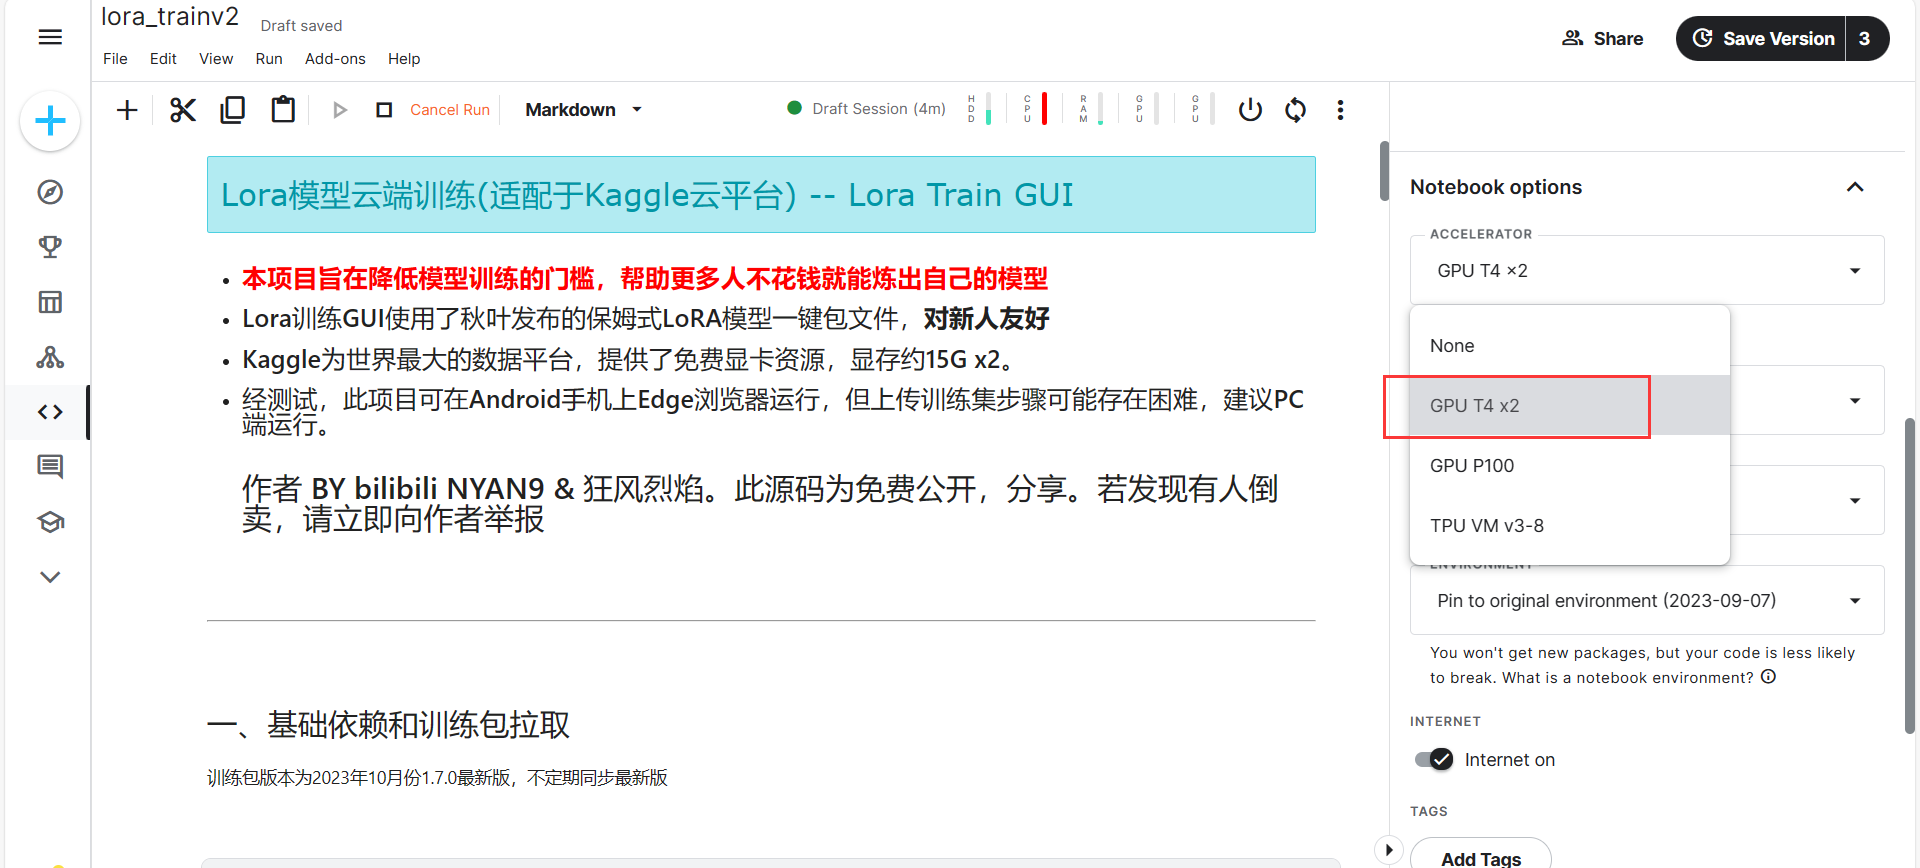
## 3. 上传训练集到右侧 Data，并修改第一个代码单元格为你自己训练集的路径。然后找一个你喜欢的底模(通常是SD 1.5,Nai,SDXL等)的下载链接
## 4. 右上角Save Version运行此脚本，高级选项中选择GPU模式<span style="color:red; font-weight:bold;">不建议用Run All运行，因为不能离线训练</span>

## 5. 找到GUI的地址，进入GUI界面，<span style="color:red; font-weight:bold;">将Lora保存目录改为/kaggle/working</span>
> ## SD 1.5(包括Nai)和 SDXL1.0模型的设置稍有不同，否则可能无法训练模型。
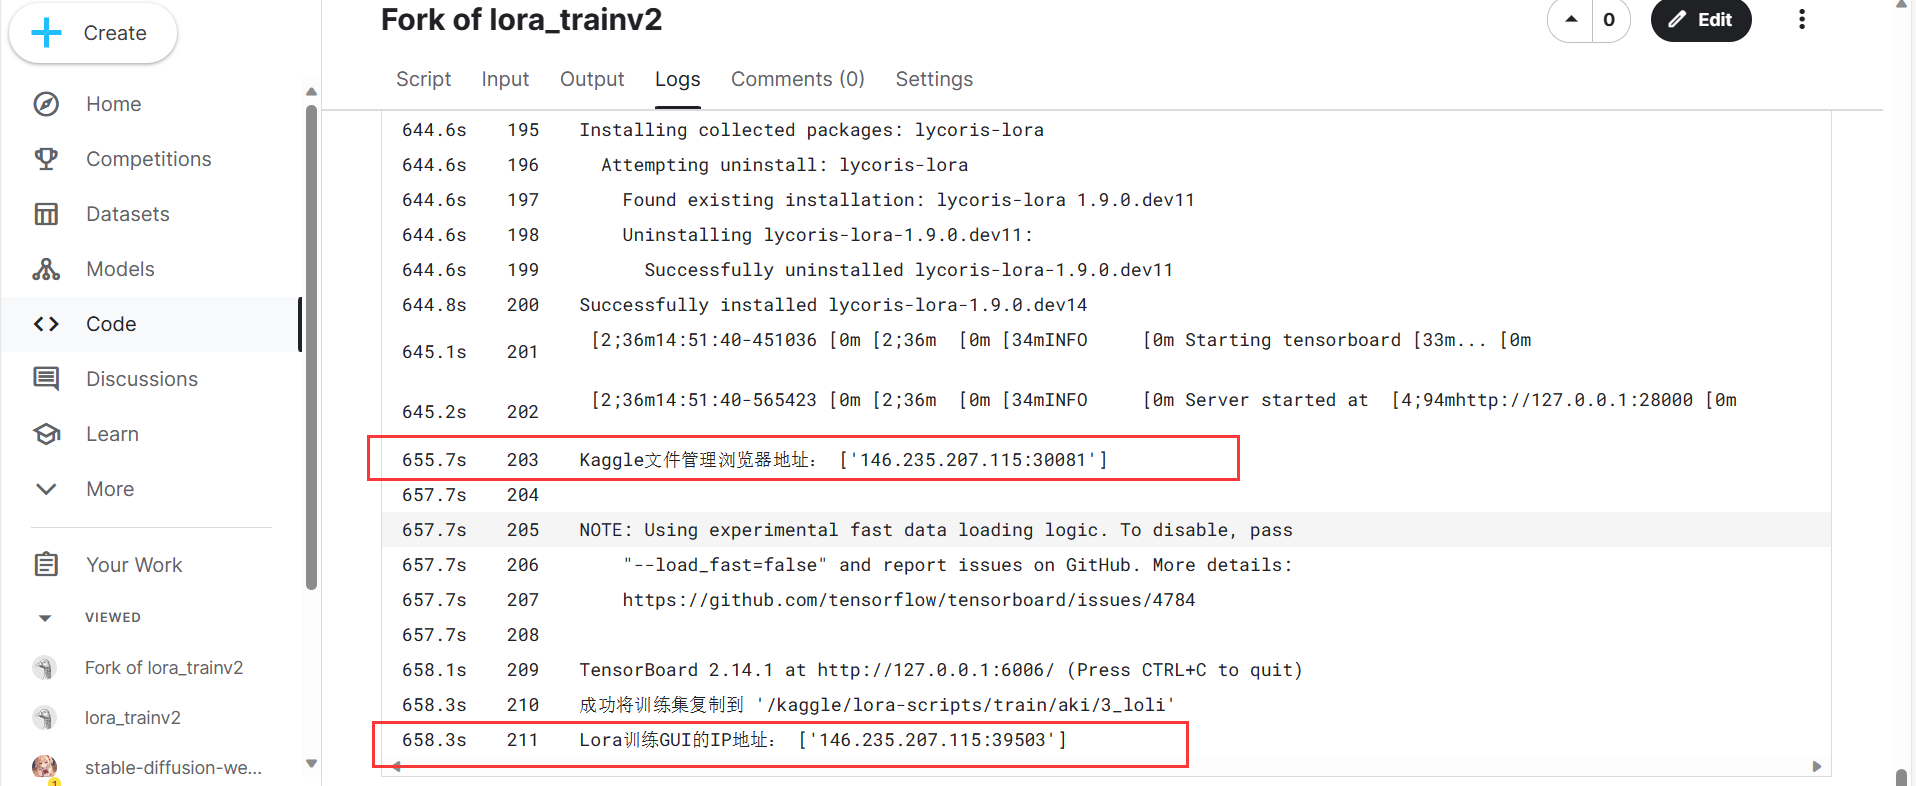
### 上面是文件浏览器地址，下面是Lora训练GUI地址。不一定是这个位置，也可能在上面一些
<img src="https://liblibai-online.vibrou.com/img/cf32769d501cbb71d052d77eb90e6bfb/6daeffceb55bc84c87667049562b292cc138655c9ac66481a7e73b5ae0318793.png" ></a>
<a href="https://smms.app/image/aNoLTF61mqBMRrV" target="_blank"><img src="https://s2.loli.net/2023/11/10/aNoLTF61mqBMRrV.png" ></a>
### 选择是SD 1.5还是SDXL。
### *特别说明：如果你的图片没有打标，请在WD 1.4标签器打标后再进行训练操作
<img src="https://liblibai-online.vibrou.com/img/cf32769d501cbb71d052d77eb90e6bfb/bf25e3079050e174d28dc3f63c845868931c9c3382ac1ef0db7cde18820f0743.png" ></a>
## 6. ,如果想要快速训练，可以把多卡训练打开，设置好之后开始训练。训练完毕后停止运行，在Output中找到训练完毕的模型，可以下载
## 7.(可选)如果想要测试训练之后的效果。可以去[Kaggle云端SD](https://www.kaggle.com/code/qq2575044704/stable-diffusion-webui-novelai-edited-version-2)测试。把笔记地址添加到云端SD的数据集里即可直接导入，无需下载 


# 关于Kaggle服务器免费提供的配置如下：

|内存|显卡|CPU| 存储 |
|------|------|------|------|
|29GB  |T4双卡 |Xeon  |系统盘 73.1G  |
|Linux   |15GB x2 |4核     |数据盘(output) 19.5G  |

# 常用训练底模链接：

SDXL： https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0/resolve/main/sd_xl_base_1.0_0.9vae.safetensors

SD 1.5: https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.safetensors

anime_pruned_full:https://huggingface.co/Zerro0/animefull-final-pruned/resolve/main/model.ckpt?download=true

kohaku_XL v7: https://civitai.com/api/download/models/203416

# 更新历史：
前身：2023年7月份创建的kohya_ss的Kaggle训练脚本，但使用麻烦，无UI界面。无法在线打标。很多人不会用
* 2023年11月10日：
## 在一些人的鼓励下，我耗时了一天写了此脚本。基于秋叶的训练GUI(对我这样的新人真的很友好)
* 2023年11月11日：
## Kaggle 云端训练Lora项目正式上线

## 觉得好用欢迎打赏我哦！有问题可以到comment中提出来。
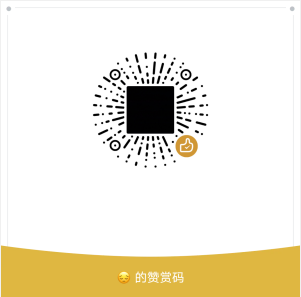